In [2]:
# JULES era5 hourly run for 2023 at lat = -65.05, lon = -60.55
# initialised to 9m of snow on ice tile 

import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import matplotlib.dates as mdates
import os
import yaml

home       = os.path.expanduser("~")
yaml_path  = os.path.join(home, 'dirpaths.yaml')
data_dir   = yaml.safe_load(open(yaml_path))['EXTANT_DATA_PATH']

fname      = 'era5.vars.nc'
fpath      = os.path.join(data_dir, 'jules', 'jules_vn7.8', 'output', 'era5_larsen_b_grid_point', fname)
output     = nc.Dataset(fpath, 'r')
start_time = pd.Timestamp('2013-01-01 00:00')


In [3]:
print(output)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): x(1), y(1), tile(9), snow(10), time(365), nt(2)
    variables(dimensions): float32 time_bounds(time, nt), float32 time(time), float32 latitude(y, x), float32 longitude(y, x), float32 snowfall(time, y, x), float32 pstar(time, y, x), float32 qw1(time, y, x), float32 lw_down(time, y, x), float32 sw_down(time, y, x), float32 u1(time, y, x), float32 v1(time, y, x), float32 t1p5m_gb(time, y, x), float32 lw_down_surft(time, tile, y, x), float32 lw_up_surft(time, tile, y, x), float32 rad_net_tile(time, tile, y, x), float32 ftl(time, tile, y, x), float32 le(time, tile, y, x), float32 tstar(time, tile, y, x), float32 z0(time, tile, y, x), float32 snow_mass(time, tile, y, x), float32 snow_depth(time, tile, y, x), float32 snow_frac(time, y, x), float32 snow_ds(time, snow, tile, y, x), float32 snow_ice(time, snow, tile, y, x), float32 snow_liq(time, snow, tile, y, x), float32 tsnow(time, sno

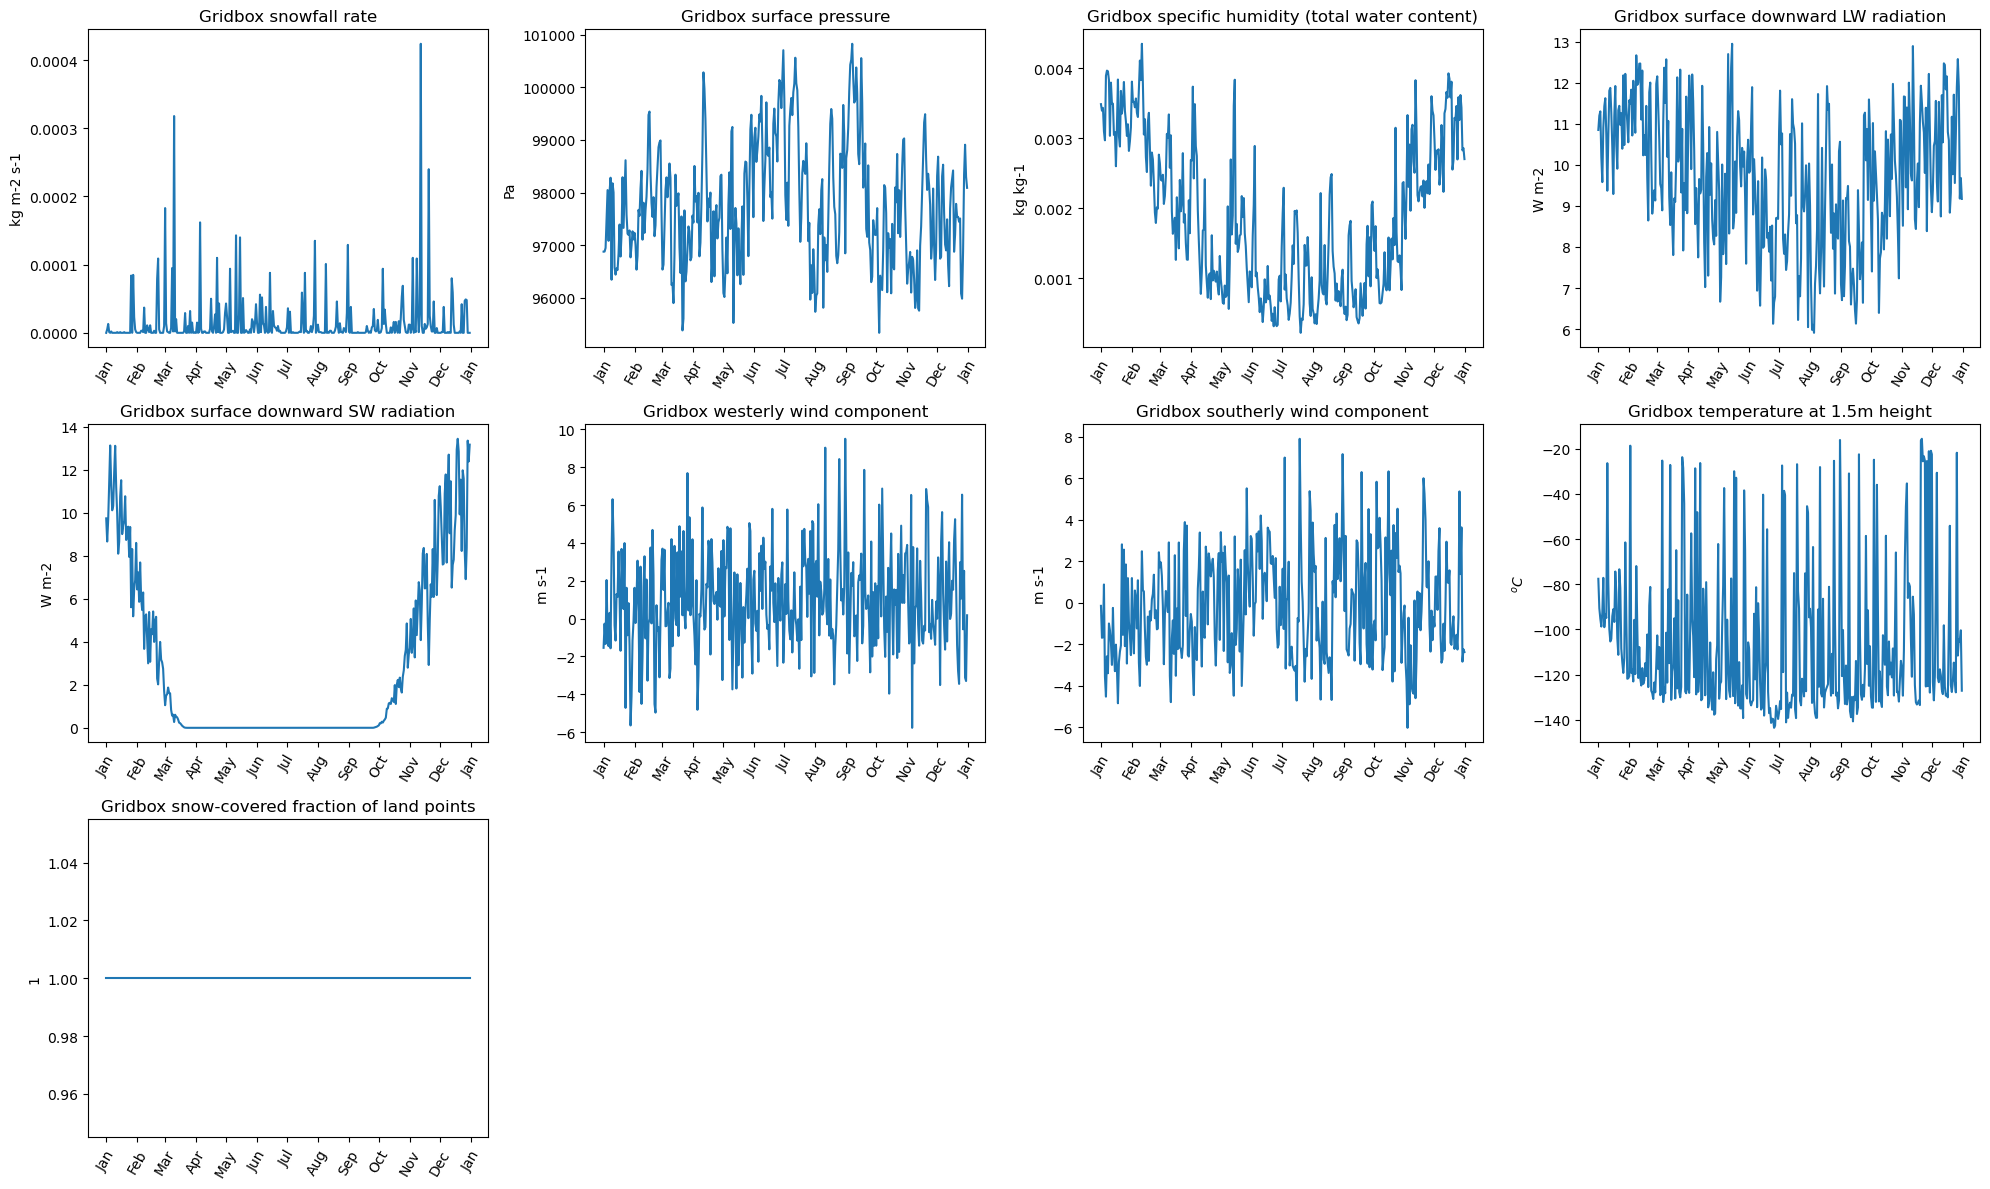

In [4]:
# plot all vars with dimensions (time, y, x)
gb_vars = [v for v in output.variables if output.variables[v].dimensions == ('time', 'y', 'x')]

fig, axes = plt.subplots(-(-len(gb_vars) // 4), 4, figsize=(20, 4 * ((len(gb_vars) + 3) // 4)))
axes = axes.flat

for ax, v in zip(axes, gb_vars):
    data = output[v][:, 0, 0]
    

    units = getattr(output[v], 'units', '')    
    time = pd.date_range(start=start_time, periods=len(data), freq='D')

    if v == 't1p5m_gb':
        data -= 273.15
        units = '$^oC$'
        
    ax.plot(time, data)
    ax.set_title(getattr(output[v], 'long_name', v))
    ax.set_ylabel(units)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.tick_params(axis='x', rotation=60)

for ax in axes[len(gb_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

(8760, 9)


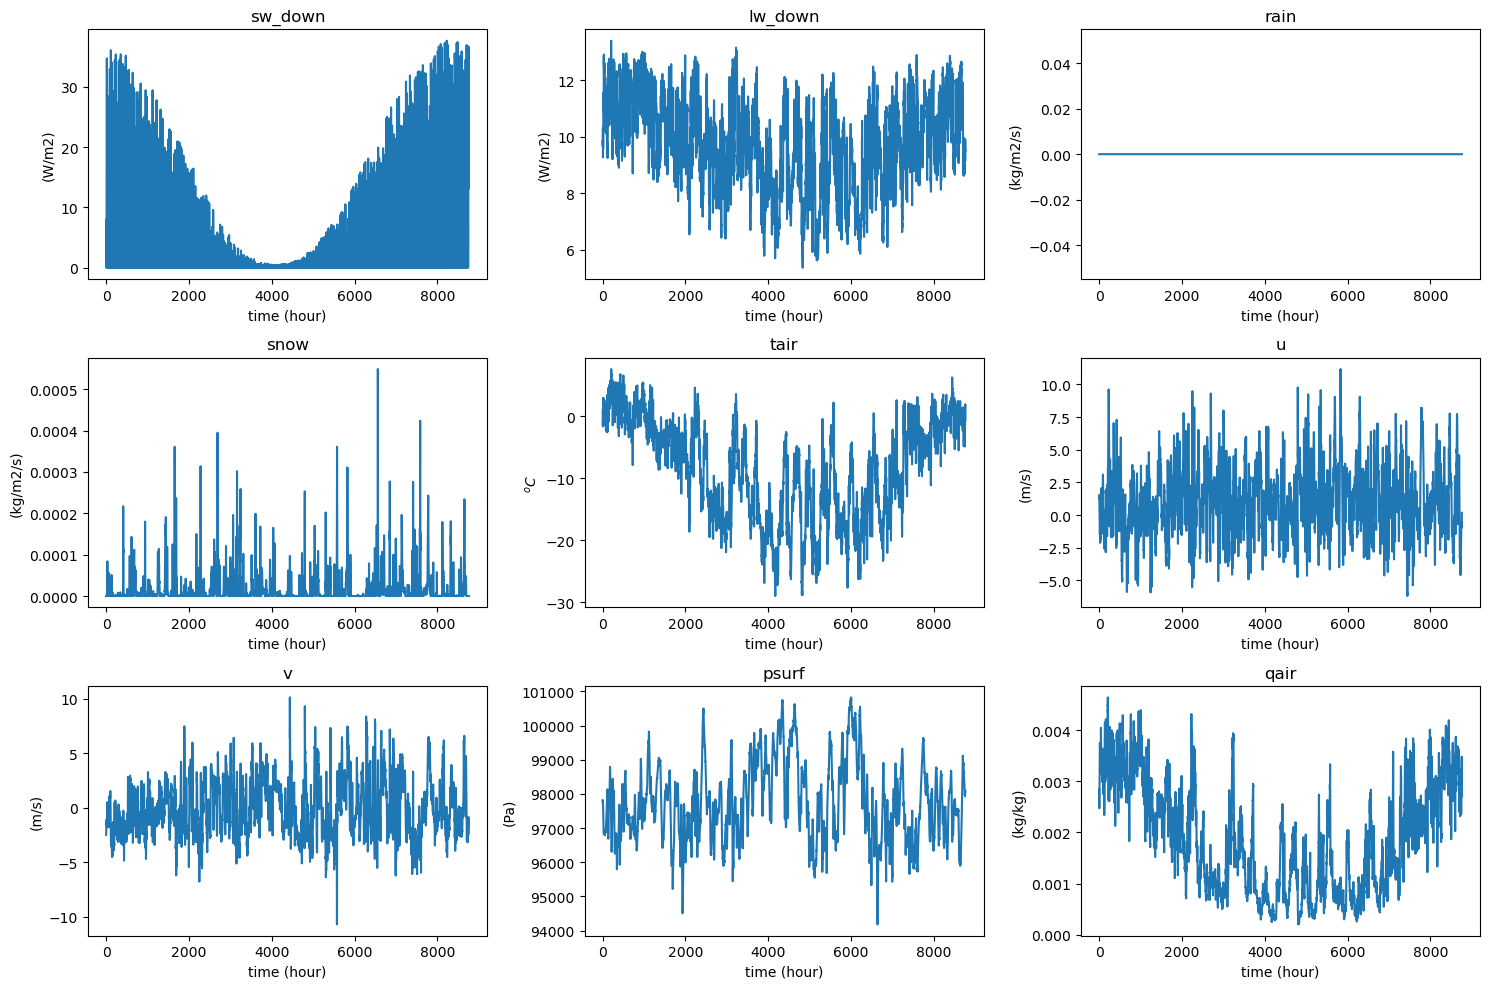

In [5]:
# plot forcing data
import pandas as pd 
import matplotlib.pyplot as plt

met_var = ['sw_down', 'lw_down', 'rain', 'snow', 'tair', 'u', 'v', 'psurf', 'qair']
met_units = ['(W/m2)', '(W/m2)', '(kg/m2/s)', '(kg/m2/s)', '(K)', '(m/s)', '(m/s)', '(Pa)', '(kg/kg)']

met = pd.read_csv('/gws/nopw/j04/extant/users/sarahshannon/jules/jules_vn7.8/input/era5/2023/era5_2023.txt',sep='\s+', skiprows=1)
print(met.shape)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  
axes = axes.flat

for ax, var, unit, col in zip(axes, met_var, met_units, met.columns):
    if var == 'tair':
        met[col] -= 273.15
        unit = '$^oC$'
        
    ax.plot(met[col])
    ax.set_title(var)
    ax.set_xlabel('time (hour)')
    ax.set_ylabel(unit)

plt.tight_layout()
plt.show()

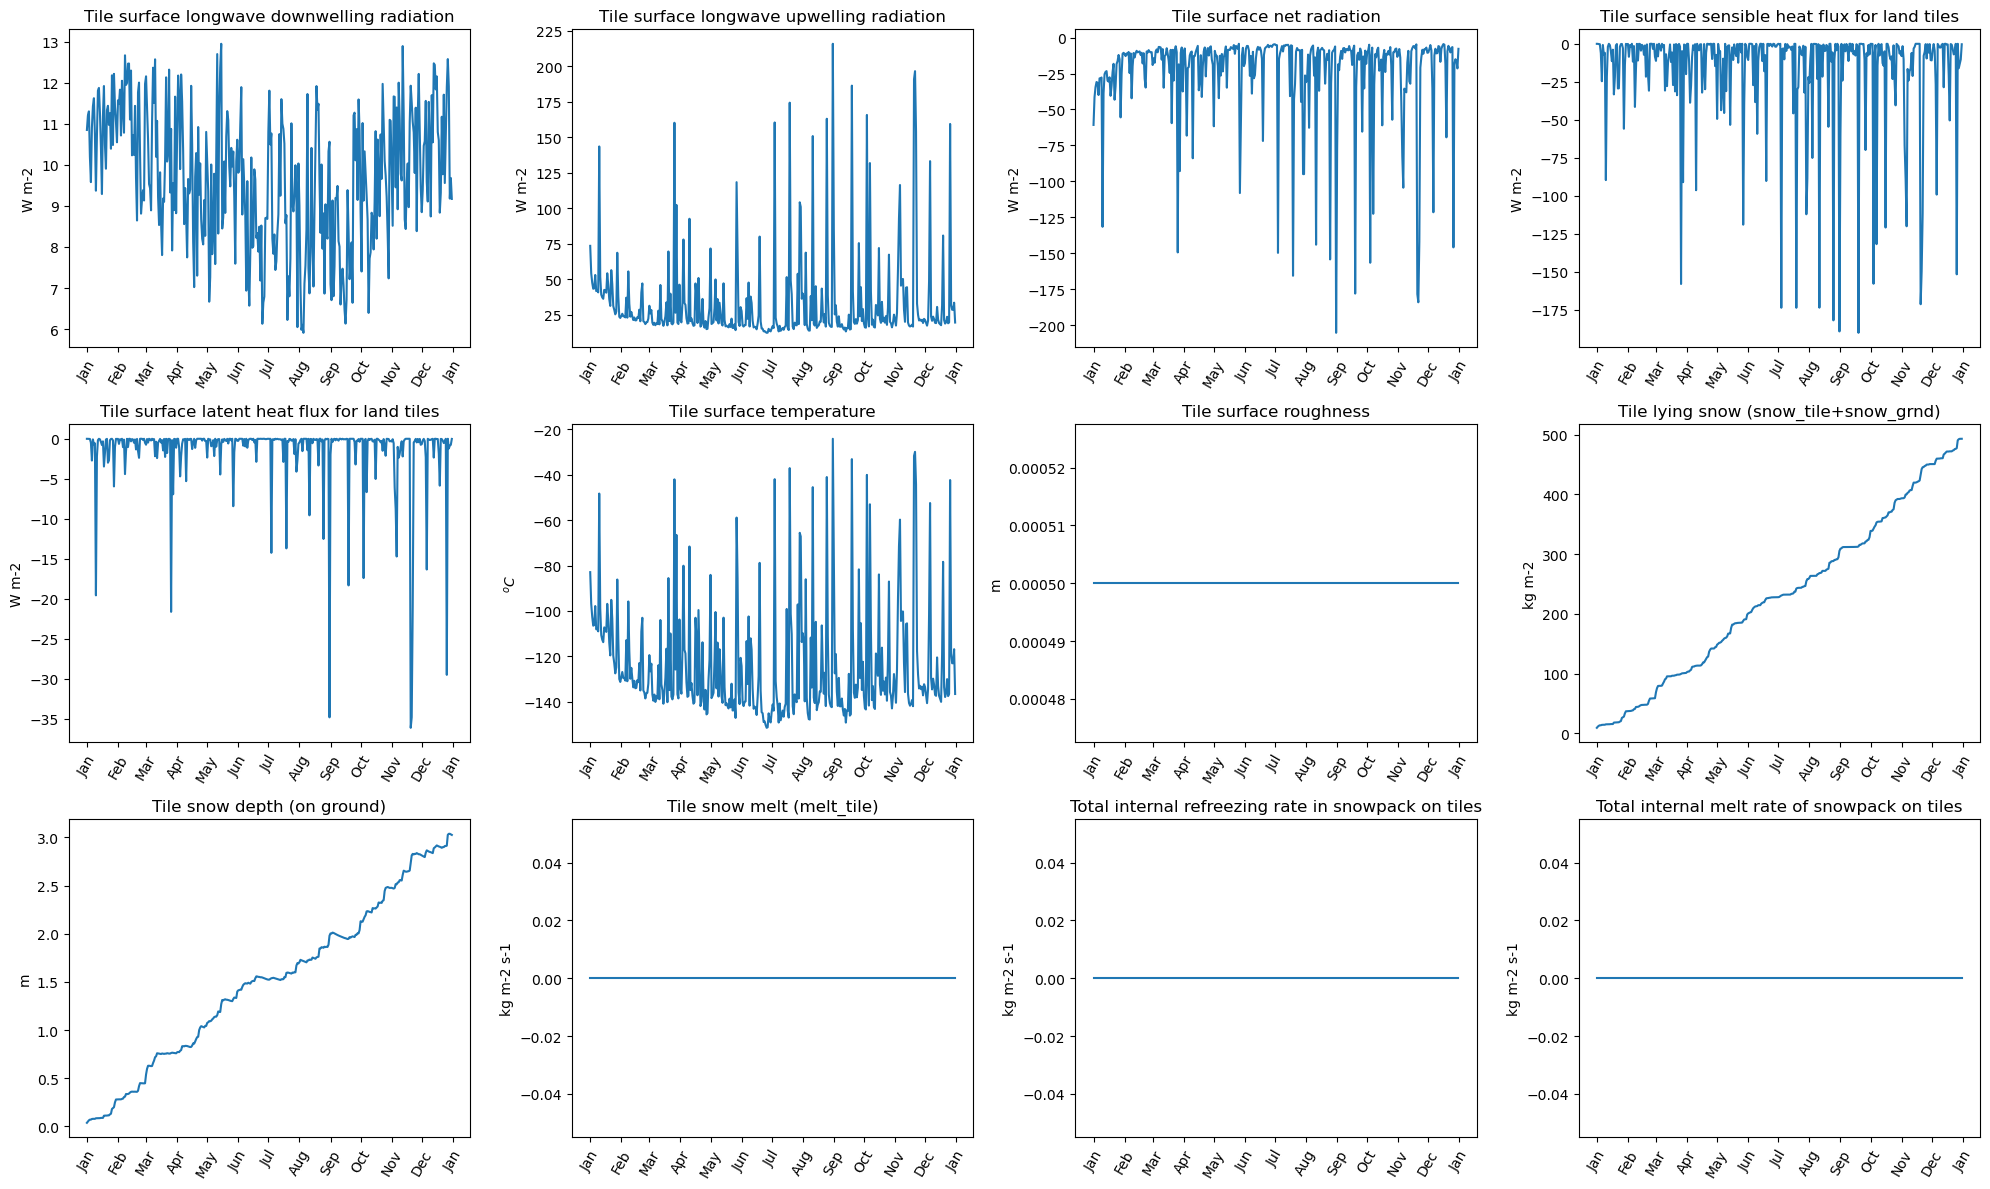

In [6]:
# plot all vars with dimensiosn (time, tile, y, x)
#tile_vars = ['ftl', 'fqw', 'q1p5m', 'le', 'q1p5m' 'tstar','surf_ht_flux']

tile_vars = [v for v in output.variables if output.variables[v].dimensions == ('time', 'tile', 'y', 'x')]

fig, axes = plt.subplots(-(-len(tile_vars) // 4), 4, figsize=(20, 4 * ((len(tile_vars) + 3) // 4)))
axes = axes.flat

for ax, v in zip(axes, tile_vars):
    data = output[v][:, -1, 0, 0]
    

    units = getattr(output[v], 'units', '')    
    time = pd.date_range(start=start_time, periods=len(data), freq='D')

    if v == 'tstar':
        data -= 273.15
        units = '$^oC$'
        
    ax.plot(time, data)
    ax.set_title(getattr(output[v], 'long_name', v))
    ax.set_ylabel(units)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.tick_params(axis='x', rotation=60)

for ax in axes[len(tile_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

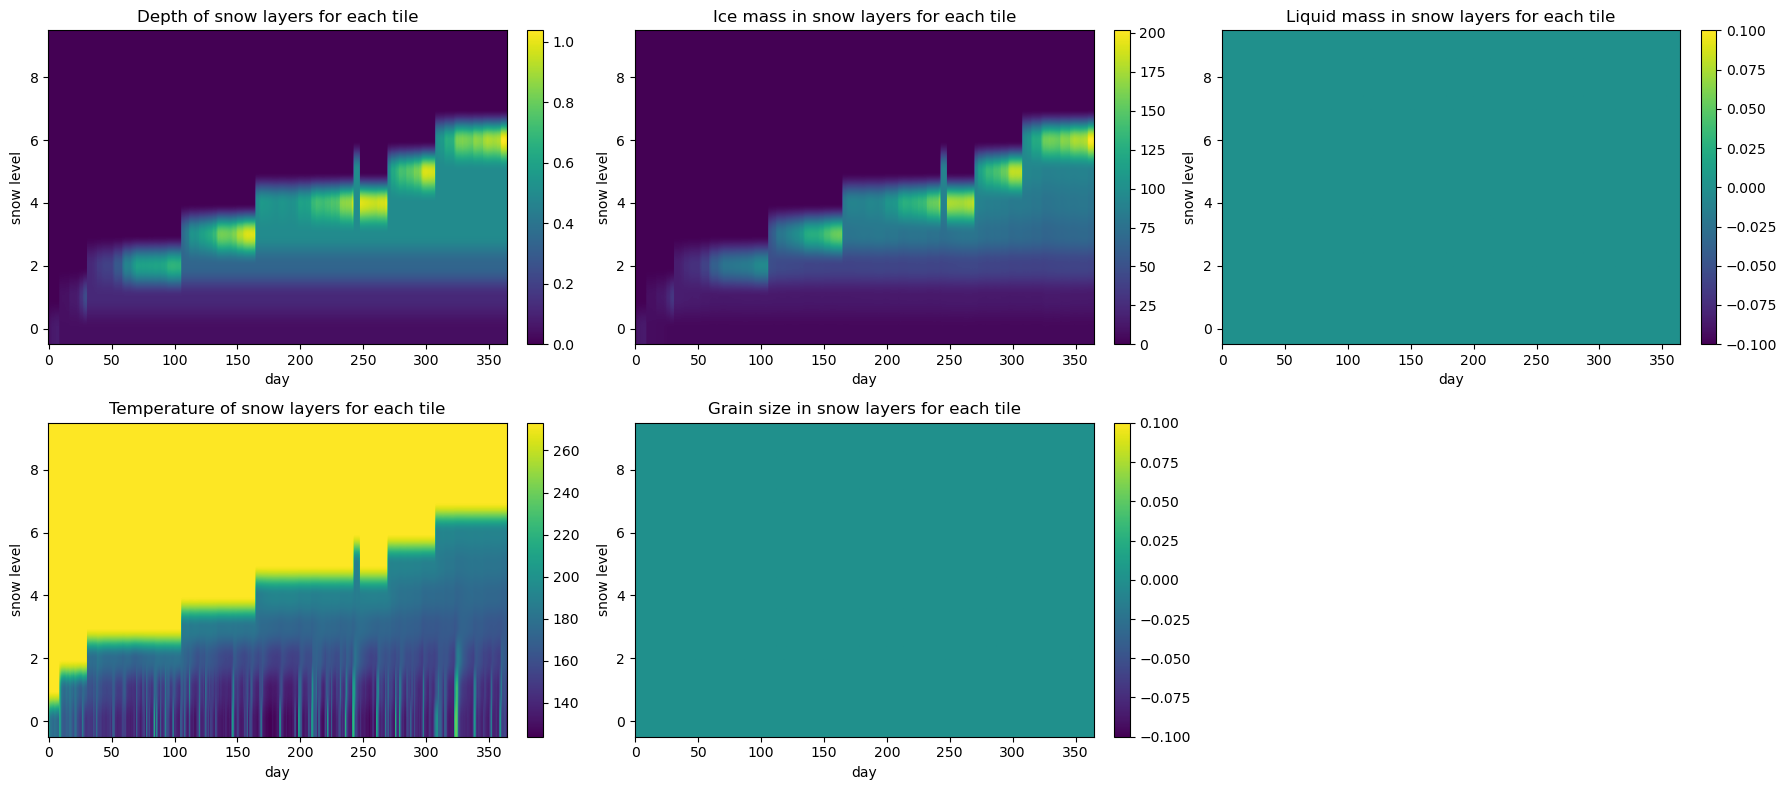

In [7]:
# plot all vars with dimensions (time, snow, tile, y, x) 
snow_vars = [v for v in output.variables if output.variables[v].dimensions == ('time', 'snow', 'tile', 'y', 'x')]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))  # 3 co
axes = axes.flat


for ax, v in zip(axes, snow_vars):
    data_2d = output[v][:,:, -1, 0, 0]
    
    im = ax.imshow(data_2d.T,aspect='auto', origin='lower')
    ax.set_title(getattr(output[v], 'long_name', v))
    ax.set_ylabel('snow level')
    ax.set_xlabel('day')
    plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    
for ax in axes[len(snow_vars):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [5]:
rgrainl = output.variables['rgrainl'][:,:,-1,0,0]
print(rgrainl) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
